In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [28]:
store_data= pd.read_excel('E:\\Apriori by Bisma(021)&Adeena(05)\\store_data.xlsx', header= None)

In [29]:
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,ITEMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
2,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
records=store_data.stack().groupby(level=0).apply(list).tolist()

In [31]:
print(records[1])

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']


In [32]:
association_rules = apriori(records, min_support=0.01, min_confidence=0.2)
association_list = list(association_rules)
print(association_list)

[RelationRecord(items=frozenset({'mineral water'}), support=0.238336443615036, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'mineral water'}), confidence=0.238336443615036, lift=1.0)]), RelationRecord(items=frozenset({'avocado', 'mineral water'}), support=0.011596907491335644, ordered_statistics=[OrderedStatistic(items_base=frozenset({'avocado'}), items_add=frozenset({'mineral water'}), confidence=0.34800000000000003, lift=1.4601208053691275)]), RelationRecord(items=frozenset({'burgers', 'eggs'}), support=0.02879232204745401, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'eggs'}), confidence=0.33027522935779813, lift=1.838074755669289)]), RelationRecord(items=frozenset({'french fries', 'burgers'}), support=0.021994134897360705, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'french fries'}), confidence=0.25229357798165136, lift=1.476370063976871)]), Relation

In [33]:
print(len(association_list))

124


In [34]:
print(association_list[100])

RelationRecord(items=frozenset({'red wine', 'spaghetti'}), support=0.010263929618768328, ordered_statistics=[OrderedStatistic(items_base=frozenset({'red wine'}), items_add=frozenset({'spaghetti'}), confidence=0.36492890995260663, lift=2.096245545531742)])


In [35]:
data=pd.DataFrame(association_list)
orderedstats=data['ordered_statistics']
listofos=list(orderedstats)
con=listofos[6][0]
print(con[2])

0.2798165137614679


In [36]:
i=0
d=data['support']
extraction=[]
lists=[]
for items in listofos:
    con=listofos[i][0]
    lists.append(con[0])
    lists.append(con[1])
    lists.append(con[2])
    lists.append(d[i])
    extraction.append(lists)
    lists=[]
    i=i+1

print(extraction)

[[frozenset(), frozenset({'mineral water'}), 0.238336443615036, 0.238336443615036], [frozenset({'avocado'}), frozenset({'mineral water'}), 0.34800000000000003, 0.011596907491335644], [frozenset({'burgers'}), frozenset({'eggs'}), 0.33027522935779813, 0.02879232204745401], [frozenset({'burgers'}), frozenset({'french fries'}), 0.25229357798165136, 0.021994134897360705], [frozenset({'burgers'}), frozenset({'green tea'}), 0.20030581039755352, 0.017462010130631832], [frozenset({'burgers'}), frozenset({'milk'}), 0.20489296636085627, 0.017861903492402027], [frozenset({'burgers'}), frozenset({'mineral water'}), 0.2798165137614679, 0.02439349506798187], [frozenset({'burgers'}), frozenset({'spaghetti'}), 0.24617737003058102, 0.021460943748333777], [frozenset({'cake'}), frozenset({'eggs'}), 0.23519736842105263, 0.01906158357771261], [frozenset({'cake'}), frozenset({'french fries'}), 0.22039473684210528, 0.017861903492402027], [frozenset({'cake'}), frozenset({'mineral water'}), 0.3388157894736842, 

In [37]:
extracteddf=pd.DataFrame(extraction)
extracteddf.columns=['base','add','confidence','support']
print(extracteddf)

                             base              add  confidence   support
0                              ()  (mineral water)    0.238336  0.238336
1                       (avocado)  (mineral water)    0.348000  0.011597
2                       (burgers)           (eggs)    0.330275  0.028792
3                       (burgers)   (french fries)    0.252294  0.021994
4                       (burgers)      (green tea)    0.200306  0.017462
..                            ...              ...         ...       ...
119           (ground beef, milk)  (mineral water)    0.503030  0.011064
120  (ground beef, mineral water)      (spaghetti)    0.416938  0.017062
121         (milk, mineral water)      (spaghetti)    0.327778  0.015729
122    (olive oil, mineral water)      (spaghetti)    0.371981  0.010264
123     (mineral water, pancakes)      (spaghetti)    0.339921  0.011464

[124 rows x 4 columns]


In [38]:
extracteddf.head(10)

,base,add,confidence,support
0,(),(mineral water),0.238336,0.238336
1,(avocado),(mineral water),0.348000,0.011597
2,(burgers),(eggs),0.330275,0.028792
3,(burgers),(french fries),0.252294,0.021994
4,(burgers),(green tea),0.200306,0.017462
5,(burgers),(milk),0.204893,0.017862
6,(burgers),(mineral water),0.279817,0.024393
7,(burgers),(spaghetti),0.246177,0.021461
8,(cake),(eggs),0.235197,0.019062
9,(cake),(french fries),0.220395,0.017862


In [39]:
extracteddf.sample(50)

,base,add,confidence,support
37,(cooking oil),(eggs),0.229765,0.011730
89,(pancakes),(mineral water),0.354839,0.033724
26,(ground beef),(chocolate),0.234735,0.023061
76,(herb & pepper),(mineral water),0.345013,0.017062
61,(frozen vegetables),(milk),0.247552,0.023594
14,(chicken),(chocolate),0.244444,0.014663
51,(escalope),(french fries),0.206723,0.016396
106,(whole wheat rice),(spaghetti),0.241458,0.014130
49,(eggs),(spaghetti),0.203264,0.036524
47,(eggs),(mineral water),0.283383,0.050920


In [40]:
extracteddf.tail(10)

,base,add,confidence,support
114,"(milk, eggs)",(mineral water),0.424242,0.013063
115,"(mineral water, eggs)",(spaghetti),0.280105,0.014263
116,"(french fries, mineral water)",(spaghetti),0.300395,0.010131
117,"(frozen vegetables, milk)",(mineral water),0.468927,0.011064
118,"(frozen vegetables, mineral water)",(spaghetti),0.335821,0.011997
119,"(ground beef, milk)",(mineral water),0.503030,0.011064
120,"(ground beef, mineral water)",(spaghetti),0.416938,0.017062
121,"(milk, mineral water)",(spaghetti),0.327778,0.015729
122,"(olive oil, mineral water)",(spaghetti),0.371981,0.010264
123,"(mineral water, pancakes)",(spaghetti),0.339921,0.011464


In [41]:
data=pd.DataFrame(association_list)
data2=data['ordered_statistics']
print(data2)

0        [((), (mineral water), 0.238336443615036, 1.0)]
1      [((avocado), (mineral water), 0.34800000000000...
2      [((burgers), (eggs), 0.33027522935779813, 1.83...
3      [((burgers), (french fries), 0.252293577981651...
4      [((burgers), (green tea), 0.20030581039755352,...
                             ...                        
119    [((ground beef, milk), (mineral water), 0.5030...
120    [((ground beef, mineral water), (spaghetti), 0...
121    [((milk, mineral water), (spaghetti), 0.327777...
122    [((olive oil, mineral water), (spaghetti), 0.3...
123    [((mineral water, pancakes), (spaghetti), 0.33...
Name: ordered_statistics, Length: 124, dtype: object


In [42]:
import matplotlib.pyplot as plt

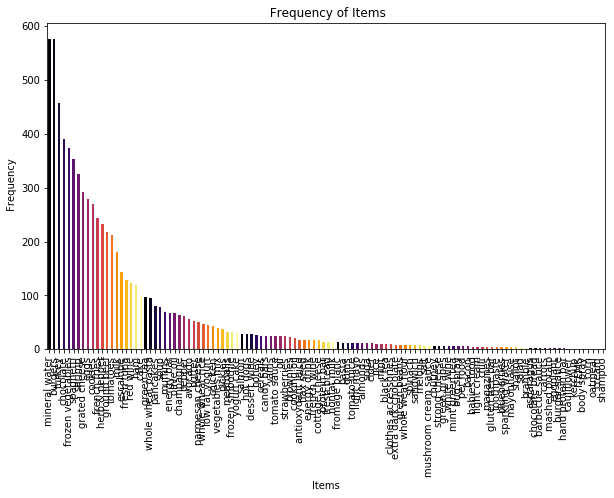

In [43]:
plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,20))
store_data[0].value_counts().plot.bar(color = color)

plt.title(' Frequency of Items')
plt.ylabel(' Frequency')
plt.xlabel('Items')
plt.show()

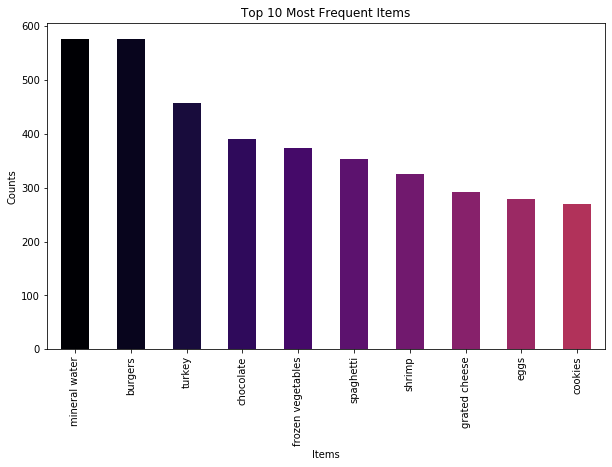

In [44]:
plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,20))
store_data[0].value_counts().head(10).plot.bar(color = color)
plt.title('Top 10 Most Frequent Items')
plt.ylabel('Counts')
plt.xlabel('Items')
plt.show()

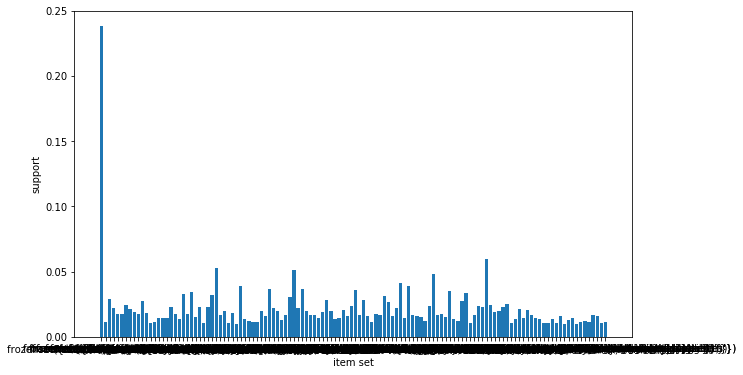

In [45]:
sup=data['support']
it=data['items']

height = sup
bars = it
y_pos = np.arange(len(bars))
 

plt.bar(y_pos, height)
 

plt.xticks(y_pos, bars)
plt.xlabel('item set')
plt.ylabel('support')

plt.show()



In [46]:
sup_of_10=[it[117:119],sup[117:119]]
print(sup_of_10)

[117         (frozen vegetables, milk, mineral water)
118    (frozen vegetables, mineral water, spaghetti)
Name: items, dtype: object, 117    0.011064
118    0.011997
Name: support, dtype: float64]


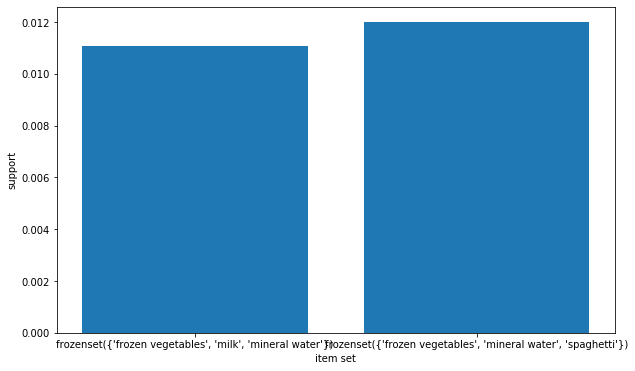

In [47]:
height = sup_of_10[1]

bars =sup_of_10[0]
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('item set')
plt.ylabel('support')
# Show graphic
plt.show()